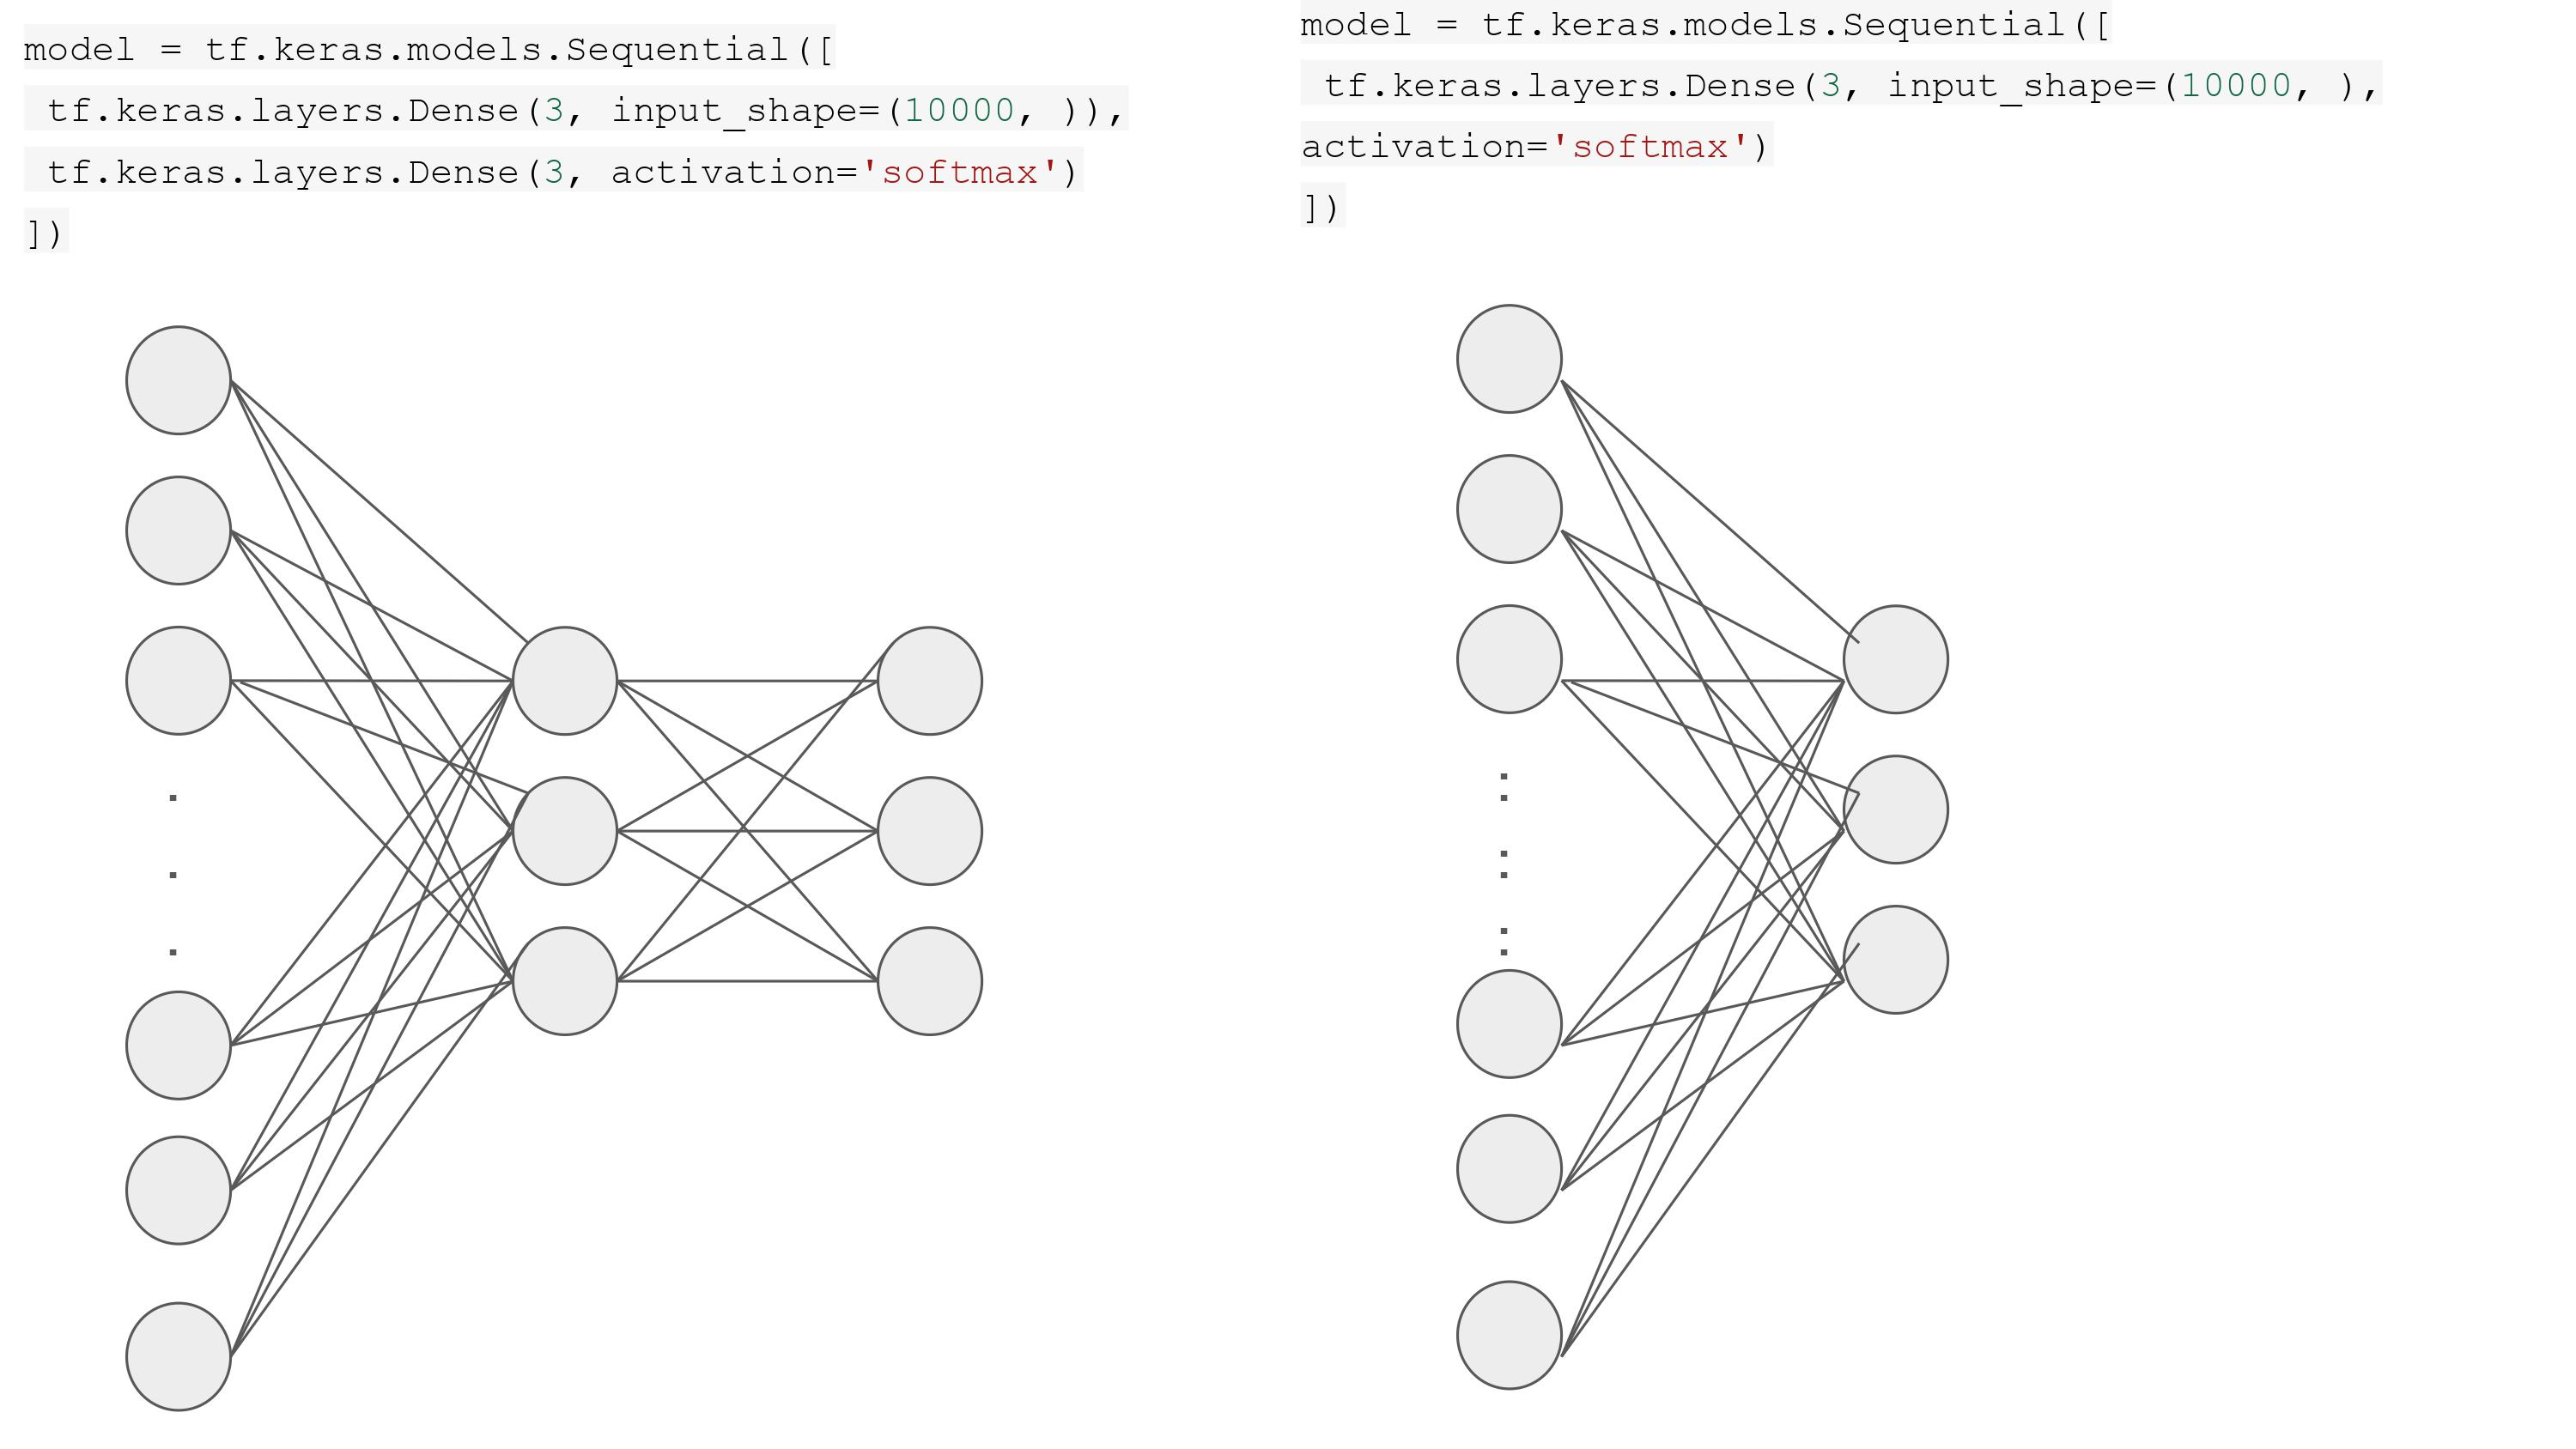

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [18]:
!git clone https://github.com/cknd/pyESN.git

Cloning into 'pyESN'...


In [20]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from pyESN.pyESN import ESN

In [6]:
mat = scipy.io.loadmat('case4_classic_data.mat')
# mat
ns = mat['pop_O2_4saving']
g2 = mat['g2_O2_4saving']
Delta = mat['Delta_a_vector']

# Normalization with each sample or whole sample

# 3 nodes and pick more points

In [8]:
g2_re = []
n_s = []
for i in range(np.shape(g2)[1]):
# for i in range(np.shape(n1)[1]):
    # input = np.reshape(ns[0],len(ns[0]))
    # input = input/sum(input)
    n_s.append(abs(ns[0][i]))
    g2_re.append({abs(g2[0][i]):Delta[0][i]})
    # g2_re.append(abs(g2[0][i]))

In [7]:
# n_new = []
# for i in range(np.shape(g2)[1]):
#     n_new.append(np.concatenate((n_s[i], n_s[i]**2, n_s[i]**3)))


In [10]:
X = np.reshape(n_s,(1000,1))
# X = n_new
Y = np.reshape(g2_re,(1000,1))
# X, Y = shuffle(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []

for ele in Y_train:
  key = list(ele[0].keys())
  value = list(ele[0].values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test:
  key = list(ele[0].keys())
  value = list(ele[0].values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

In [22]:
#Initialize the ESN model
esn = ESN(n_inputs=1, n_outputs=1,
          n_reservoir=1000,  # Number of neurons in the reservoir
          spectral_radius=0.1,
          random_state=42)

# Train ESN on the data
esn.fit(X_train, Y_train_g2)

# Predict on test data
y_pred = esn.predict(X_test)

0.001026992392918391


Text(0.5, 1.0, 'ESN')

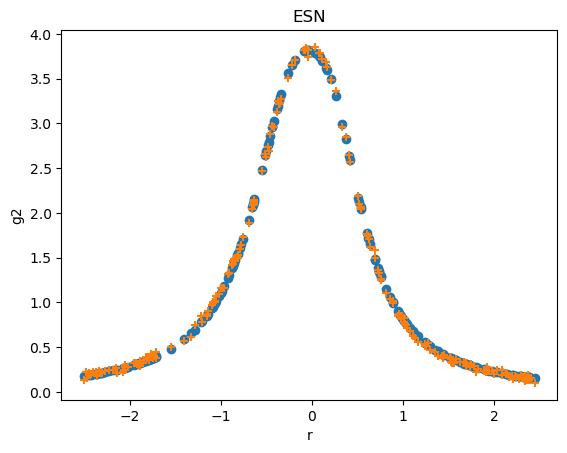

In [30]:
# plt.scatter(Y_test_r, Y_test_g2)
error = mean_squared_error(Y_test_g2,y_pred)
print(error)
plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, y_pred,marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('ESN')

In [ ]:
# checkpoint_path = "cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# history = model.fit(X_train, Y_train, validation_data=[X_test, Y_test], batch_size=20, epochs=500, callbacks=[cp_callback])
# model.fit(X_train, Y_train, validation_data=[X_test, Y_test], batch_size=200, epochs=200)
history = model.fit(X_train, Y_train_g2, batch_size=16, epochs=1000)

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0428
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0430
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0416
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0388
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0387
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0355
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0328
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317
Epoch 9/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0330
Epoch 10/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0312
Epoch 11/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309
Epoch 12/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285
Epoch 13/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0300
Epoch 14/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0333
Epoch 15/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

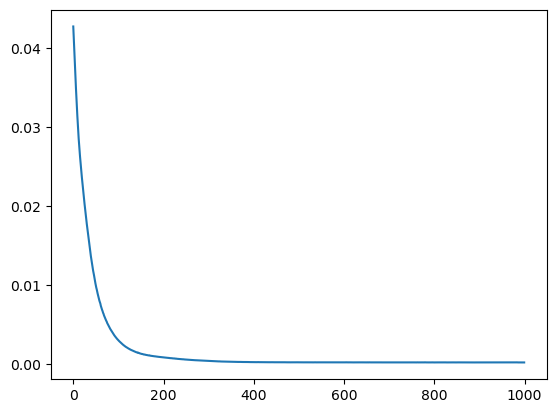

In [83]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [85]:
Y_predict = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train_g2)

# 테스트 결과 예측
Y_predict_linear_regression = regressor.predict(X_test)
# 출처: https://giveme-happyending.tistory.com/185 [소연의_개발일지:티스토리]

0.00016518061909355454


Text(0, 0.5, 's_predict')

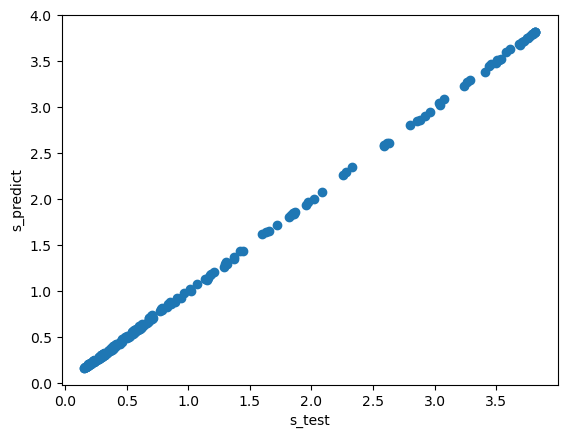

In [87]:
error = mean_squared_error(Y_test_g2,Y_predict)
print(error)
plt.scatter(Y_test_g2[:,0], Y_predict[:,0])
# plt.ylim([0, 0.7])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')


Text(0.5, 1.0, 'Classic')

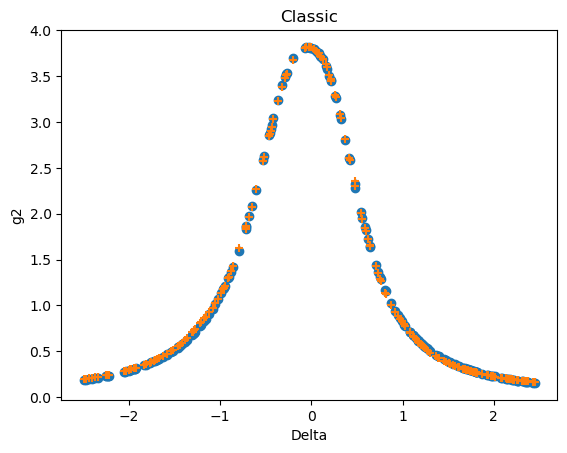

In [91]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict[:,0],marker="+")
plt.xlabel('Delta')
plt.ylabel('g2')
plt.title('Classic')

In [ ]:
Y_test_r_6 = Y_test_r
Y_predict_6 = Y_predict[:,0]
Y_test_g2_6 = Y_test_g2

In [ ]:
Y_test_r_16 = Y_test_r
Y_predict_16 = Y_predict[:,0]
Y_test_g2_16 = Y_test_g2

In [ ]:
Y_test_r_8 = Y_test_r
Y_predict_8 = Y_predict[:,0]
Y_test_g2_8 = Y_test_g2

In [ ]:
Y_test_r_4 = Y_test_r
Y_predict_4 = Y_predict[:,0]
Y_test_g2_4 = Y_test_g2

In [ ]:
Y_predict_6

In [ ]:
# plt.subplot(2,1,1)
plt.scatter(Y_test_g2[:,0], Y_predict_linear_regression[:,0])
# plt.ylim([0.7, 0.9])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')
# plt.subplot(2,1,2)


In [ ]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict_linear_regression[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('3 nodes')

In [ ]:
Y_test